In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings; warnings.filterwarnings('ignore')

In [8]:
#Loading dataset
booking = pd.read_csv('zoo.csv')
df = booking[["feathers", "eggs", "milk","aquatic","legs","toothed","backbone","breathes","fins","class_type"]]

In [9]:
df

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type
0,0,0,1,0,4,1,1,1,0,1
1,0,0,1,0,4,1,1,1,0,1
2,0,1,0,1,0,1,1,0,1,4
3,0,0,1,0,4,1,1,1,0,1
4,0,0,1,0,4,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,0,2,1,1,1,0,1
97,0,1,0,0,6,0,0,1,0,6
98,0,0,1,0,4,1,1,1,0,1
99,0,1,0,0,0,0,0,1,0,7


In [10]:
#Dataset info
df.shape

(101, 10)

In [11]:
df.describe()


,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.198020,0.584158,0.405941,0.356436,2.841584,0.603960,0.821782,0.792079,0.168317,2.831683
std,0.400495,0.495325,0.493522,0.481335,2.033385,0.491512,0.384605,0.407844,0.376013,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,2.000000
75%,0.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [12]:
#Extracting and analysing through isolation forest
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.1, random_state=42)
df['is_inlier_IF'] = iso_forest.fit_predict(df)

In [13]:
inliers_IF = df[df['is_inlier_IF'] == 1]
outliers_IF = df[df['is_inlier_IF'] == -1]

In [14]:
outliers_IF

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type,is_inlier_IF
13,0,1,0,0,0,0,0,0,0,7,-1
48,0,0,1,1,4,1,1,1,0,1,-1
53,0,1,0,1,8,0,0,0,0,7,-1
63,0,1,1,1,4,0,1,1,0,1,-1
72,0,0,0,0,8,0,0,1,0,7,-1
75,0,0,1,1,2,1,1,1,1,1,-1
76,0,0,0,1,0,1,1,0,0,3,-1
77,0,1,0,1,0,0,0,0,0,7,-1


In [15]:
inliers_IF

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type,is_inlier_IF
0,0,0,1,0,4,1,1,1,0,1,1
1,0,0,1,0,4,1,1,1,0,1,1
2,0,1,0,1,0,1,1,0,1,4,1
3,0,0,1,0,4,1,1,1,0,1,1
4,0,0,1,0,4,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
96,0,0,1,0,2,1,1,1,0,1,1
97,0,1,0,0,6,0,0,1,0,6,1
98,0,0,1,0,4,1,1,1,0,1,1
99,0,1,0,0,0,0,0,1,0,7,1


In [16]:
def is_inlier(row):
    # Feather Constraint: Birds have feathers
    if row['class_type'] == 2:
        if row['feathers'] != 1:
            return -1

    # Egg Constraint: Bird, Fish, Amphibian lay egg
    if row['class_type'] in [2, 4, 5]:
        if row['eggs'] != 1:
            return -1

    # Milk Constraint: Mammal gives milk
    if row['class_type'] == 1:
        if row['milk'] != 1:
            return -1

    # Aquatic Constraint: Fishes are always aquatic
    if row['class_type'] == 4:
        if row['aquatic'] != 1:
            return -1

    # Leg Constraint: Birds have 2 legs
    if row['class_type'] == 2:
        if row['legs'] != 2:
            return -1

    # Tooth Constraint: Fish don't have teeth
    if row['class_type'] == [4]:
        if row['toothed'] != 1:
            return -1

    # Backbone Constraint: Mammal, Bird, Reptile and Fish don't have backbone
    if row['class_type'] in [1, 2, 3, 4]:
        if row['backbone'] != 1:
            return -1
            
    # Breathe Constraint: Fishes use gills instead of lungs to breath
    if row['class_type'] == [4]:
        if row['breathes'] == 1:
            return -1

    # Fin Constraint: Fish have fins
    if row['class_type'] == [4]:
        if row['fins'] != 1:
            return -1

    # Leg Constraint: Insects have 6 legs
    if row['class_type'] == [6]:
        if row['legs'] != 6:
            return -1

    # Leg Constraint: Amphibian have 4 legs
    if row['class_type'] == [5]:
        if row['legs'] != 4:
            return -1

    # If all constraints are satisfied, return True
    return 1

In [17]:
#Extracting and analysing through human-written constraints
df['is_inlier_HW'] = df.apply(is_inlier, axis=1)

In [18]:
inliers_HW = df[df['is_inlier_HW'] == 1]
outliers_HW = df[df['is_inlier_HW'] == -1]
outliers_HW

,feathers,eggs,milk,aquatic,legs,toothed,backbone,breathes,fins,class_type,is_inlier_IF,is_inlier_HW


In [19]:
#disagreements between two methods
df['similar'] = abs(df['is_inlier_IF'] + df['is_inlier_HW']) / 2

In [20]:
mismatch = df[df['similar'] == 0]
similar = df[df['similar'] == 1]

In [21]:
#writing the disagreed datapoints into csv
mismatch.to_csv("disagreement.csv")

In [22]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(df['is_inlier_HW'], df['is_inlier_IF'])
conf_matrix

array([[ 0,  0],
       [ 8, 93]])

Text(95.72222222222221, 0.5, 'Handwritten')

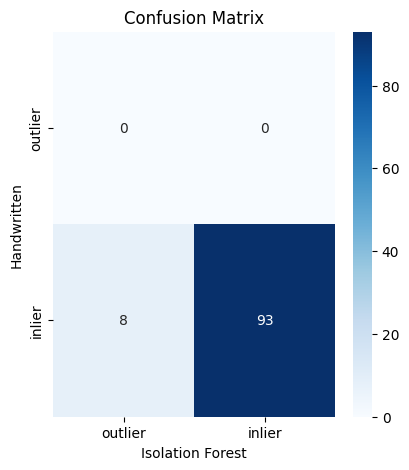

In [23]:
# Plot confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["outlier","inlier"], yticklabels=["outlier","inlier"])
plt.title("Confusion Matrix")
plt.xlabel("Isolation Forest")
plt.ylabel("Handwritten")

In [24]:
#Both agree it is inlier
all_inlier = df[(df['is_inlier_IF'] == 1) & (df['is_inlier_HW'] == 1)] 
all_inlier.to_csv("all_inlier.csv")

In [25]:
#Both agree it is outlier
all_outlier = df[(df['is_inlier_IF'] == -1) & (df['is_inlier_HW'] == -1)] 
all_outlier.to_csv("all_outlier.csv")